<a href="https://colab.research.google.com/github/esraasaidmaray/project-based-learning/blob/master/Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Fraud Detection in Financial Transactions

---



---



## Data Collection and Preprocessing

### imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import zipfile

### Reading the data

In [ ]:
!pip install kaggle


In [ ]:
!chmod 600 /content/kaggle.json


chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 92% 164M/178M [00:02<00:00, 105MB/s] 
100% 178M/178M [00:02<00:00, 79.5MB/s]


 Unzip the downloaded file

In [ ]:
with zipfile.ZipFile('paysim1.zip', 'r') as zip_ref:
    zip_ref.extractall('paysim1')

In [ ]:
df=pd.read_csv('paysim1/PS_20174392719_1491204439457_log.csv')


In [ ]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


one hot encoding

In [ ]:
df=pd.get_dummies(df,columns=['type'])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


Feature Scaling

For better classification to ensure features are on same scale

In [ ]:
scaler=StandardScaler()

In [ ]:
features_to_scale=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,False,False,False,True,False
1,1,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,False,False,False,True,False
2,1,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,False,False,False,False,True
3,1,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,False,True,False,False,False
4,1,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,False,False,False,True,False


In [ ]:
df[features_to_scale].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,-4.946736e-17,-1.779646e-17,6.590049e-16,1.498762e-16,-1.340452e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.978545e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01
25%,-2.756812e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01
50%,-1.738653e-01,-2.837972e-01,-2.924417e-01,-2.847734e-01,-2.749863e-01
75%,4.779197e-02,-2.515606e-01,-2.431065e-01,-4.638324e-02,-3.077931e-02
max,1.527936e+02,2.034149e+01,1.666523e+01,1.044120e+02,9.660911e+01


### Outlier Detection

box plots

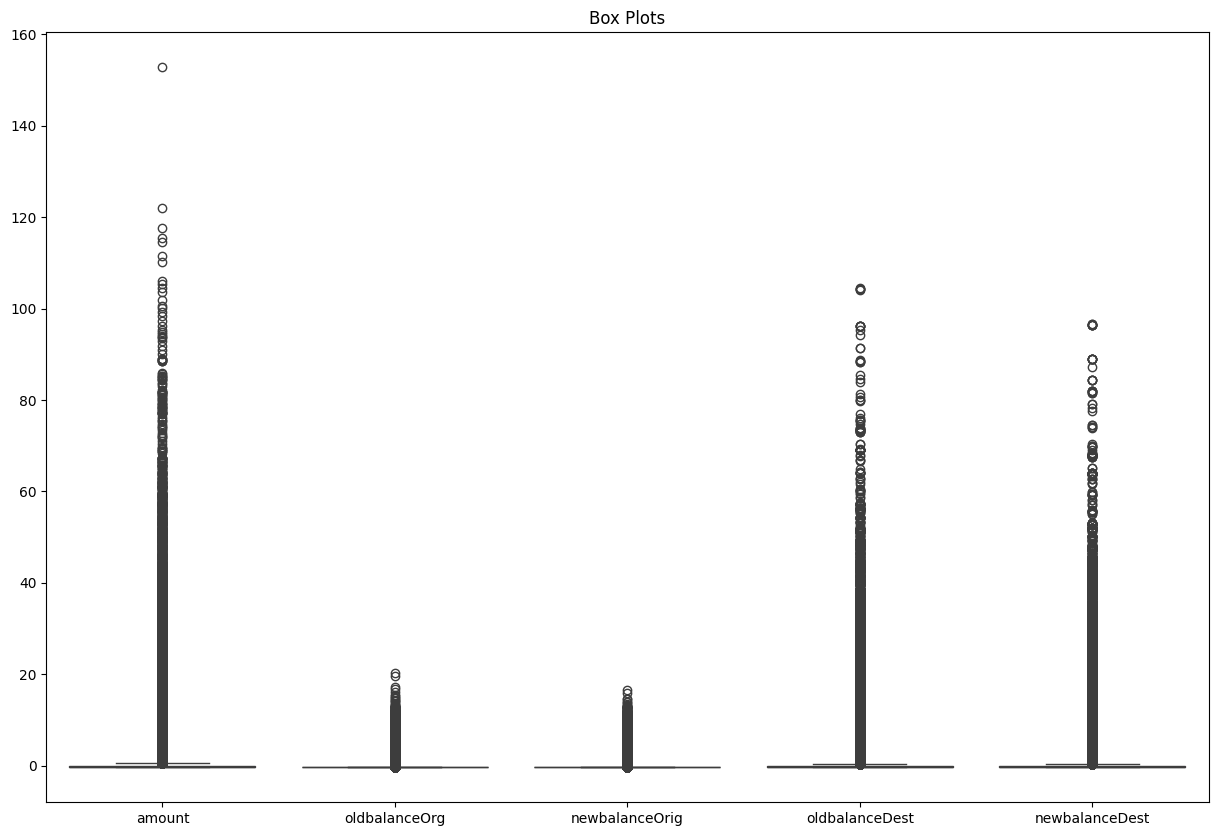

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[features_to_scale])
plt.title('Box Plots')
plt.show()

observation: Fraud detection datasets,especially in financial transactions, often have many outliers because frauds may involve unusually high amounts or suspicious behavior in terms of balances.

### Feature engineering

creating new features

In [ ]:
df['balance_diff_orig']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balance_diff_dest']=df['oldbalanceDest']-df['newbalanceDest']

using SMOTE to generate synthetic examples of the minority class.
As the fraud transactions are much less than the normal ones

In [ ]:
x=df.drop('isFraud',axis=1)
x=df.drop(['nameOrig','nameDest'], axis=1) #for using smot that needs only numerical columns
y=df['isFraud']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smot=SMOTE(random_state=42)
x_sm, y_sm = smot.fit_resample(x, y)

In [ ]:
print(f"After resmapling:{pd.Series(y_sm).value_counts()}")

After resmapling:isFraud
0    6354407
1    6354407
Name: count, dtype: int64


## Machine Learning model an statistcal analysis

In [ ]:
fraud=df[df['isFraud']==1]
not_fraud=df[df['isFraud']==0]

In [ ]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest
count,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.0,8213.000000,8213.000000,8213.000000
mean,368.413856,2.133126,0.282450,-0.226645,-0.163702,0.014891,1.0,0.001948,0.509095,-0.178593
std,216.388690,3.981486,1.228332,0.672241,0.981537,1.063876,0.0,0.044097,0.832280,0.506616
min,1.000000,-0.297855,-0.288716,-0.292442,-0.323814,-0.333411,1.0,0.000000,0.003725,-4.044202
25%,181.000000,-0.087389,-0.245153,-0.292442,-0.323814,-0.333411,1.0,0.000000,0.047055,-0.093959
50%,367.000000,0.433151,-0.136727,-0.292442,-0.323814,-0.332139,1.0,0.000000,0.154792,0.009598
75%,558.000000,2.215602,0.236784,-0.292442,-0.280324,-0.045255,1.0,0.000000,0.524123,0.009598
max,743.000000,16.262325,20.341491,16.665226,69.172514,64.097238,1.0,1.000000,3.676264,5.075276


In [ ]:
not_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0,6.354407e+06,6.354407e+06
mean,2.432357e+02,-2.757041e-03,-3.650637e-04,2.929362e-04,2.115828e-04,-1.924637e-05,0.0,0.0,-6.579998e-04,2.308292e-04
std,1.421402e+02,9.873792e-01,9.996197e-01,1.000321e+00,1.000006e+00,9.999148e-01,0.0,0.0,3.416090e-02,2.157559e-01
min,1.000000e+00,-2.978545e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01,0.0,0.0,-5.799666e-01,-2.768644e+01
25%,1.560000e+02,-2.757162e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01,0.0,0.0,3.725258e-03,-1.082781e-02
50%,2.390000e+02,-1.741753e-01,-2.838453e-01,-2.924417e-01,-2.845951e-01,-2.749263e-01,0.0,0.0,3.725258e-03,9.597510e-03
75%,3.340000e+02,4.720124e-02,-2.516803e-01,-2.429450e-01,-4.605731e-02,-3.076132e-02,0.0,0.0,8.083233e-03,2.145506e-02
max,7.180000e+02,1.527936e+02,1.488274e+01,1.464801e+01,1.044120e+02,9.660911e+01,0.0,0.0,1.500582e+00,7.886721e+00


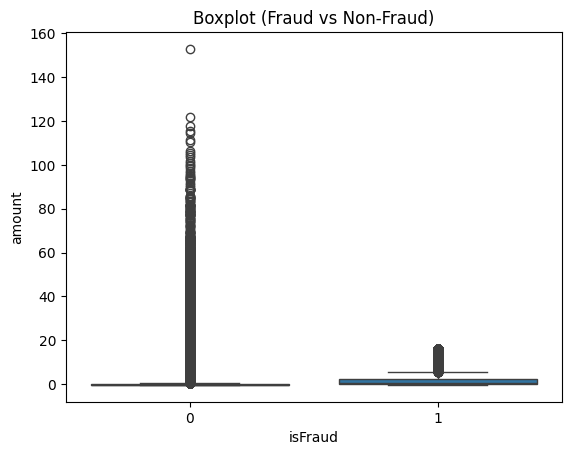

In [ ]:
sns.boxplot(x='isFraud',y='amount',data=df)
plt.title('Boxplot (Fraud vs Non-Fraud)')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import classification_report

### logistic regression

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("Logistic Regression Results:")
print(classification_report(y_test,pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      1.00      1.00      1620

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(x_train,y_train)
RF_pred=RF_model.predict(x_test)
print("RandomForestClassifier Results:")
print(classification_report(y_test,RF_pred))

RandomForestClassifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      1.00      1.00      1620

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



##  Advanced Techniques and Azure Integration

In [ ]:
!pip install azureml-core

In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install azureml-dataprep


In [ ]:
!pip install azureml.train.automl

  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.19.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 1.18.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.18.0 requires pandas>=1.5.3, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
geopandas 1.0.1 requi

In [ ]:
from azureml.core import Workspace
from azureml.core import Datastore, Dataset
from azureml.train.automl import AutoMLConfig
from azureml.core.experiment import Experiment
from azureml.core.model import Model
from azureml.core.webservice import AciWebservice, Webservice
from azureml.core.model import InferenceConfig
import mlflow
import mlflow.sklearn


/usr/local/lib/python3.10/dist-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/usr/local/lib/python3.10/dist-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


initializing workspace

In [ ]:
work_space=Workspace.create(name='fraud-detection-workspace',
                      subscription_id='3b6040c4-0174-439e-82be-075d49ed51e0',
                      resource_group='fraud-detection-group',
                      location='eastus')

WorkspaceException: WorkspaceException:
	Message: Workspace with name 'fraud-detection-workspace' already exists under resource group with name 'fraud-detection-group'.
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Workspace with name 'fraud-detection-workspace' already exists under resource group with name 'fraud-detection-group'."
    }
}

In [ ]:
work_space.write_config()

NameError: name 'work_space' is not defined

In [ ]:
work_space=Workspace.get(name='fraud-detection-workspace',
                           subscription_id='3b6040c4-0174-439e-82be-075d49ed51e0',
                           resource_group='fraud-detection-group')

Upload the Dataset to Azure Blob Storage

Access the datastore

In [ ]:
data_st=work_space.get_default_datastore()

In [ ]:
print(data_st)

{
  "name": "workspaceblobstore",
  "container_name": "azureml-blobstore-b9c63842-2be3-4500-a2d9-721b14461c6e",
  "account_name": "frauddetstoragef006b6ec2",
  "protocol": "https",
  "endpoint": "core.windows.net"
}


Upload to the blob

In [ ]:
dataset=Dataset.File.upload_directory(src_dir='/content',target=(data_st,'datasets/'),overwrite=True)

Validating arguments.
Arguments validated.
'overwrite' is set to True. Any file already present in the target will be overwritten.
Uploading files from '/content' to 'datasets/'
Copying 23 files with concurrency set to 2
Copied /content/.config/config_sentinel, file 1 out of 23. Destination path: https://frauddetstoragef006b6ec2.blob.core.windows.net/azureml-blobstore-b9c63842-2be3-4500-a2d9-721b14461c6e/datasets/.config/config_sentinel
Copied /content/.config/.last_survey_prompt.yaml, file 2 out of 23. Destination path: https://frauddetstoragef006b6ec2.blob.core.windows.net/azureml-blobstore-b9c63842-2be3-4500-a2d9-721b14461c6e/datasets/.config/.last_survey_prompt.yaml
Copied /content/.config/gce, file 3 out of 23. Destination path: https://frauddetstoragef006b6ec2.blob.core.windows.net/azureml-blobstore-b9c63842-2be3-4500-a2d9-721b14461c6e/datasets/.config/gce
Copied /content/.config/active_config, file 4 out of 23. Destination path: https://frauddetstoragef006b6ec2.blob.core.windows

In [ ]:
!pip install inference-schema
!pip install azureml-defaults
!pip install pytorch-transformers==1.0.0
!pip install spacy==3.7.4
!pip install xgboost==1.5.2
!pip install pandas==1.3.5
!pip uninstall pandas statsmodels
!pip install statsmodels==0.13.2
!pip show pandas statsmodels

Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-1.3.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-1.3.5
Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/statsmodels/*
Proceed (Y/n)? y
  Successfully uninstalled statsmodels-0.13.2
y
  Using cached statsmodels-0.13.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached statsmodels-0.13.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.0 MB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolv

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 

In [ ]:
!pip install pandas==1.3.5

  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.19.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 1.18.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.18.0 requires pandas>=1.5.3, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
geopandas 1.0.1 requi

In [ ]:
!pip install statsmodels==0.13.2

In [ ]:
!pip uninstall torch


Found existing installation: torch 2.4.1+cpu
Uninstalling torch-2.4.1+cpu:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.4.1+cpu.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/torch/include/ATen/cuda/CUDAConfig.h
    /usr/local/lib/python3.10/dist-packages/torch/include/THC/THCAtomics.cuh
    /usr/local/lib/python3.10/dist-packages/torch/include/THC/THCDeviceUtils.cuh
    /usr/local/lib/python3.10/dist-packages/torch/include/c10/cuda/impl/cuda_cmake_macros.h
    /usr/local/lib/python3.10/dist-packages/torch/include/tensorpipe/common/cuda_buffer.h
    /usr/local/lib/python3.10/dist-packages/torch/include/tensorpipe/config_cuda.h
    /usr/loc

using cpu

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu


using gpu

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Y
Looking in indexes: https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 634.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 21.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 105.9 MB/s eta 0:00:00
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=d39c65a94e5049e86fce1695b4e2bcfd4067b6bb48909d3a71d494ba662caf3f
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Check if CUDA is available (for GPU installations)


2.0.1+cu117
True


In [ ]:
dataset =dataset.register(workspace=work_space,name='fraud-detection-dataset')

convert to tabular format

In [ ]:
dataset=Dataset.Tabular.from_delimited_files(path=(data_st,'/datasets/paysim1/PS_20174392719_1491204439457_log.csv'))

In [ ]:
df=dataset.to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


Train the Model in Azure

In [ ]:
Azure_auto_config = AutoMLConfig(
    task="classification",
    primary_metric="AUC_weighted",
    experiment_timeout_hours=6,
    training_data=dataset,
    label_column_name='isFraud',
    n_cross_validations=5)

Run the experiment

In [ ]:
Experi=Experiment(work_space,"fraud-detection")
run=Experi.submit(Azure_auto_config)
run.wait_for_completion()

2024-09-24 20:10:36.564213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 20:10:36.850414: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 20:10:36.929841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Experiment,Id,Type,Status,Details Page,Docs Page
fraud-detection,AutoML_131cc0c5-0245-4b95-af09-7702036a7117,automl,Preparing,Link to Azure Machine Learning studio,Link to Documentation


2024/09/24 20:56:07 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


### Deploy the Model as a Web Service

In [ ]:
model=run.register_model(model_name='fraud_detection_model',model_path='outputs/model.pkl')

NameError: name 'run' is not defined

In [ ]:
inferenceConfig=InferenceConfig(entry_script='score.py',environment='sklearn-env')

In [ ]:
ACI_deploy_config=AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)


Deploying the model

In [ ]:
service=Model.deploy(workspace=work_space,name='fraud-detection-service',
                       models=[model],inference_config=inferenceConfig,
                       deployment_config=ACI_deploy_config)
service.wait_for_deployment(show_output=True)
print(service.state)

## MLOps

Start MLFlow tracking

In [ ]:
mlflow.start_run()

# Log parameters, model, and metrics
mlflow.log_param("n_estimators", 100)
mlflow.sklearn.log_model(rf_model, "random_forest_model")
mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_rf))

# End the run
mlflow.end_run()
